## People Analytics Project: 

### Background/Introduction:

Attrition and Turnover Rate refers to the rate at which employees leave a company. Employee turnover is a costly problem for organizations. The cost of replacing an employee can be quite large, and a study found that companies typically pay about one-fifth of an employee's salary to replace them. 

The cost can significantly increase if executives or highest-paid employees are to be replaced. The cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role. 

### Problem Statement:

To understand why and when employees are most likely to leave an oroganisation. This can help structure the actions to improve employee retention as well as possibly planning new hiring in advance. We will attempt to address the problem statement using the below questions:

1. What is the likelihood of an active employee leaving the company?
2. What are the key indicators of an employee leaving the company?
3. What policies or strategies can be adopted based on the results to improve employee retention?
   
Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (likely to stay), 1 (likely to leave). In this study, our target variable Y is the probability of an employee leaving the company.

### Project Structure:

- Data Exploration and Saving to Unity Catalog.

- Exploratory Data Analysis (To View distribution, summary, skewness and visualisation)

- Feature Selection using A/B Testing: (ANOVA and Chi-Square)

- Data Preprocessing: (Scaling and Encoding)

- Model Training and Evaluation:

- Logging parameters, metrics, metadata, input_examples, model.fpkl, artifacts and plots using Databricks Mlflow for reproducibility.

- Model Evaluation using Classification Report & Confusion matrix.

- Model Explainability using SHAP Values.

- Best Model, Conclusion and Further Recommendations 



### Data Exploration:

In this case study, a HR dataset was sourced from IBM Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees. I will use this dataset to predict when employees are going to quit by understanding the main drivers of employee churn.

### Dataset Source:

The IBM HR Analytics Employee Attrition & Performance dataset is used for this project. It can be found at https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

#### Importing Libraries/Modules

We will import all the required libraries and modules required for our project as follows:

In [0]:
# Run this cell first to initialize Spark
# (You can leave it empty or add a simple command)

In [0]:

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings('ignore')  # Optional: to suppress warnings



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/databricks/python_shell/scripts/db_ipykernel_launcher.py", line 23, in <module>
    main()
  File "/databricks/python_shell/scripts/db_ipykernel_launcher.py", line 19, in main
    DatabricksKernelApp.launch_instance(config=databricks_kernel_config())
  File "/databricks/python/lib/python3.11/site-packages/traitlets/config/application.py", line 1053, in launch_instance
    app.start()
  File "/databricks/python/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File 

---------------------------------------------------------------------------
ImportError                               Traceback (most recent call last)
File <command-7703993598718535>, line 6
      3 import numpy as np
      5 # Data visualization
----> 6 import seaborn as sns
      7 import matplotlib.pyplot as plt
      8 import matplotlib.pylab as pylab

File /databricks/python_shell/lib/dbruntime/autoreload/discoverability/hook.py:71, in AutoreloadDiscoverabilityHook._patched_import(self, name, *args, **kwargs)
     65 if not self._should_hint and (
     66     (module := sys.modules.get(absolute_name)) is not None and
     67     (fname := get_allowed_file_name_or_none(module)) is not None and
     68     (mtime := os.stat(fname).st_mtime) > self.last_mtime_by_modname.get(
     69         absolute_name, float("inf")) and not self._should_hint):
     70     self._should_hint = True
---> 71 module = self._original_builtins_import(name, *args, **kwargs)
     72 if (fname := fname or 

### Importing Data:

Let us import the dataset using spark to know what the data contains.

 Spark is an open-source, distributed big data processing framework designed for fast computation and scalable analytics. 

In [0]:
df = spark.read.csv("/Volumes/workspace/default/attrition_ml_pipeline/WA_Fn-UseC_-HR-Employee-Attrition.csv", header=True, inferSchema=True)
display(df)



Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [0]:
df_pandas = df.toPandas()
df_pandas = df_pandas.drop(
    ["EmployeeCount", "EmployeeNumber", "Education", "StandardHours"],
    axis=1
)

In [0]:
# Count rows
num_rows = df_pandas.count()

# Count columns
num_cols = len(df_pandas.columns)


The Dataset has 1470 records and 35 fields. Lets explore further and see their data types and uniformity. 

#### Exploratory Data Analysis: 

In [0]:
df_pandas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int32 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int32 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int32 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int32 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int32 
 10  JobInvolvement            1470 non-null   int32 
 11  JobLevel                  1470 non-null   int32 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int32 
 14  MaritalStatus           

 **Lets check how the summary statistics looks like** 

In [0]:

df_pandas.describe()


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Key Observations & Insights:

Distance from Home: Ranges from 1 to 29 miles, with an average of 9 miles. Employees living farther away may have lower job satisfaction.

Number of Companies Worked: Ranges from 0 to 9, suggesting frequent job changes could be linked to higher attrition.

Promotions: Some employees have not received a promotion in over 15 years, which may impact motivation and retention.

Years in Current Role: Average of about 4 years, indicating possible role stagnation that could contribute to attrition.

Years with Current Manager: Average of about 4 years, showing that manager-employee relationships may influence retention.

Monthly Income: Ranges from 1,009 to 19,999, with an average of 6,503. A high standard deviation (6,707) suggests income inequality, with a few employees earning significantly more.

Stock Option Level: Low average (0.79) with most employees receiving little or no equity. Limited stock options may affect motivation and retention, especially in certain roles or departments.

Training Times Last Year: Low variation, with some employees receiving no training. Limited learning opportunities might contribute to attrition.  

Features such as Distance from Home, Career Tenure and Promotions, Monetary Benefits, and Growth and Learning Opportunities show notable patterns in the descriptive analysis, indicating that these variables may have a meaningful impact on employee behavior, attrition and satisfaction. 


In [0]:
df_pandas

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,2,No,14,3,4,0,17,3,2,9,6,0,8


### Unique Values in coulmn to check data variability and category diversity:

In [0]:
Values_BusinessTravel = df_pandas["BusinessTravel"].value_counts()
Values_Educationfield = df_pandas["EducationField"].value_counts()
Values_JobRole = df_pandas["JobRole"].value_counts()
Values_Department = df_pandas["Department"].value_counts()

print(f"Values in Educationfield:\n{Values_Educationfield}")
print(f"Values in BusinessTravel:\n{Values_BusinessTravel}")
print(f"Values in JobRole:\n{Values_JobRole}")
print(f"Values in Department:\n{Values_Department}")

Values in Educationfield:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Values in BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Values in JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Values in Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


### Data Visualization: 

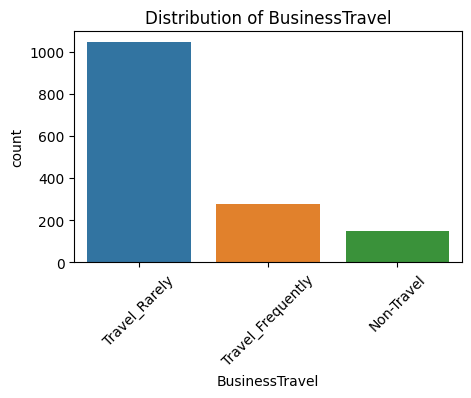

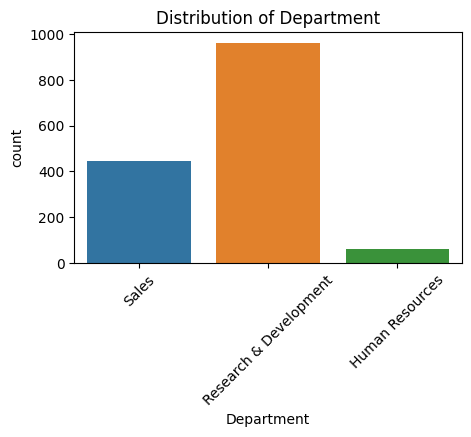

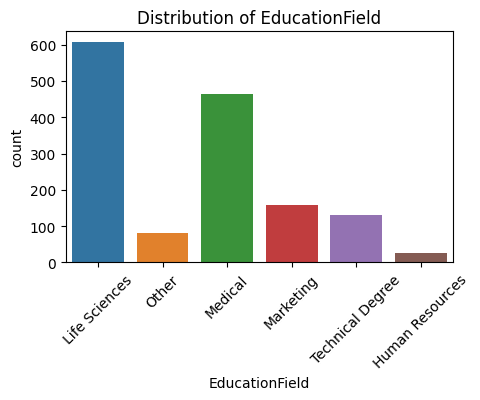

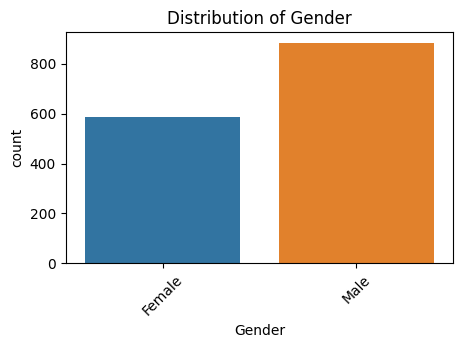

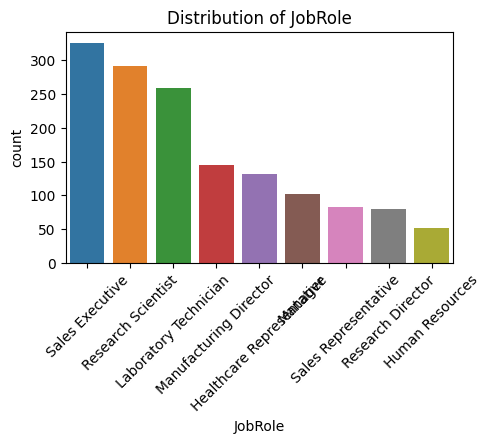

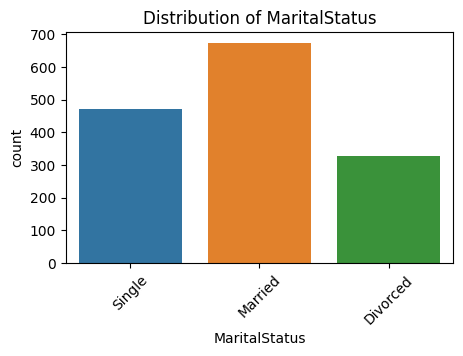

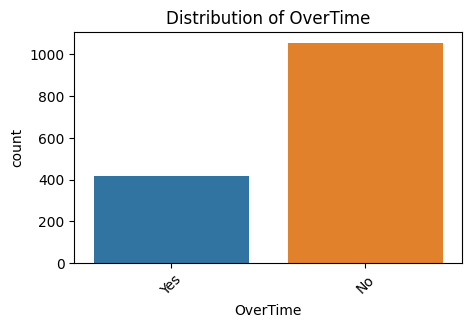

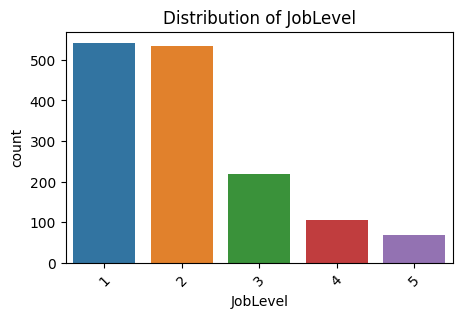

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender', 
    'JobRole', 'MaritalStatus', 'OverTime' , 'JobLevel']

# Convert only the needed columns to pandas
pdf = df.select(categorical_cols).toPandas()

for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=pdf)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


From the plot, we can see that most employees work in the Research and Development department, primarily in roles such as Sales Executive, Research Scientist, and Laboratory Technician. Most of these employees have educational backgrounds in Life Sciences and Medical fields. 


### Looking into data Skewness using Histrograms: 

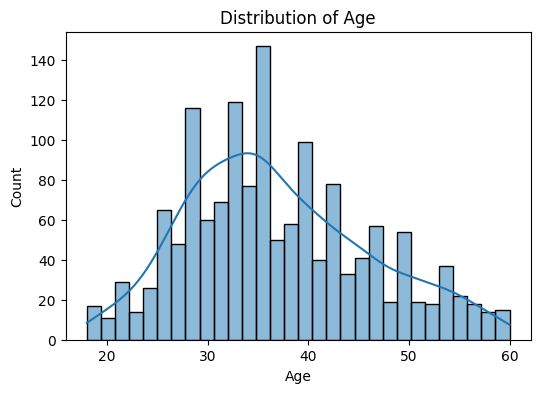

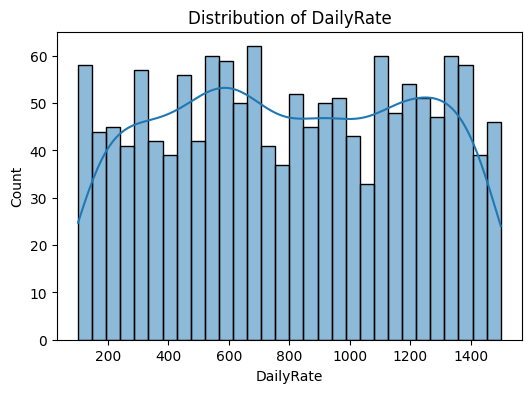

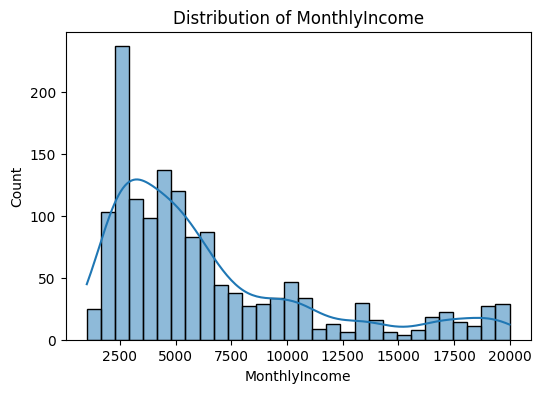

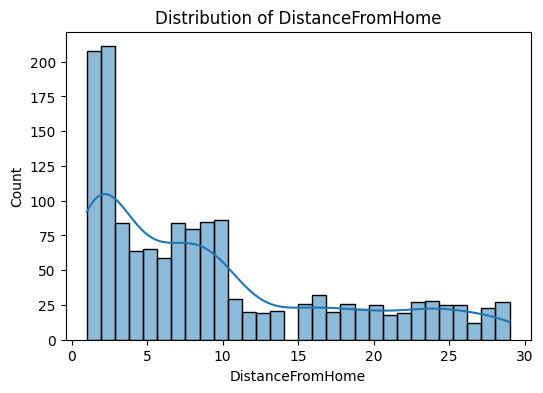

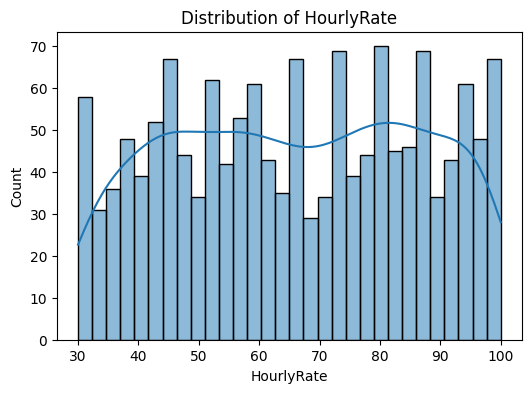

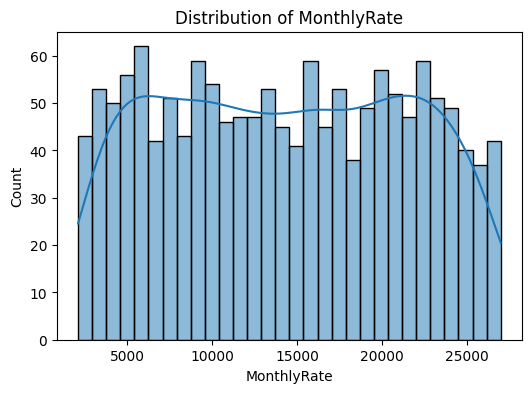

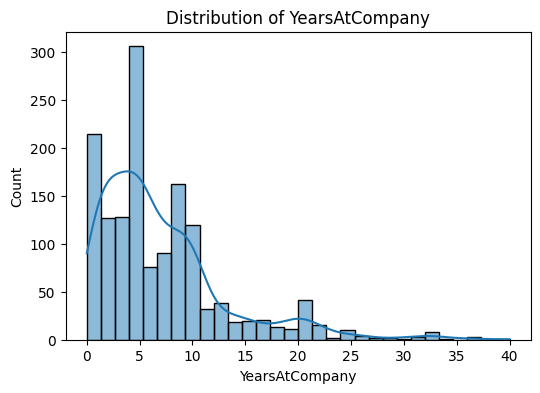

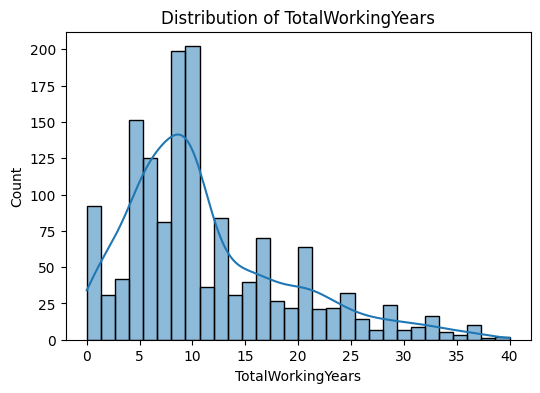

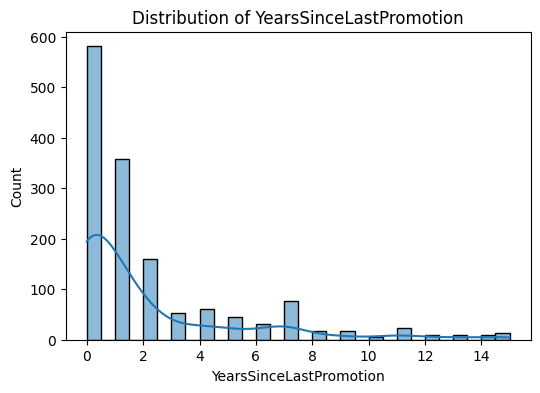

In [0]:
numerical_cols = ['Age', 'DailyRate', 'MonthlyIncome', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate',
                  'YearsAtCompany', 'TotalWorkingYears', 'YearsSinceLastPromotion']

df[numerical_cols].describe()

df_pandas = df.toPandas()

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_pandas[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()



Features such as Distance from Home, Monthly Income, Years at Company, Years Since Last Promotion, and Total Working Years show right-skewed distributions, with most values concentrated on the lower end and a few large outliers. This skewness can negatively affect model performance.

Action:
To address this, we apply the log1p transformation, which compresses large values and slightly expands smaller ones—resulting in a more balanced distribution and improved model accuracy. 

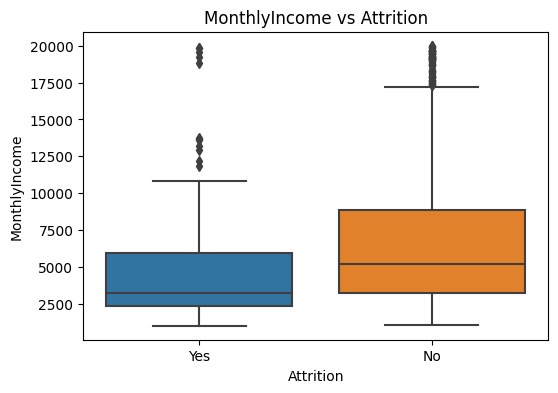

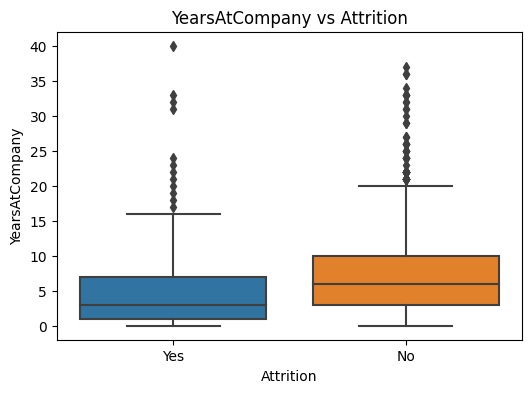

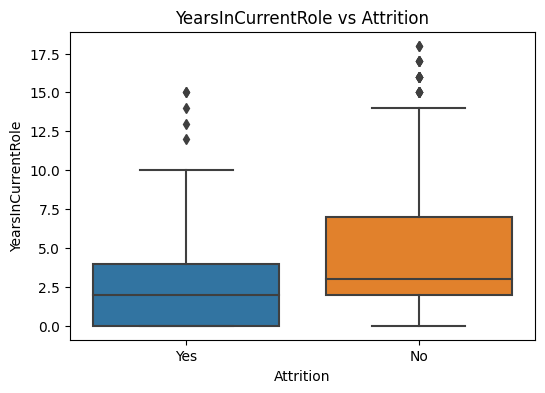

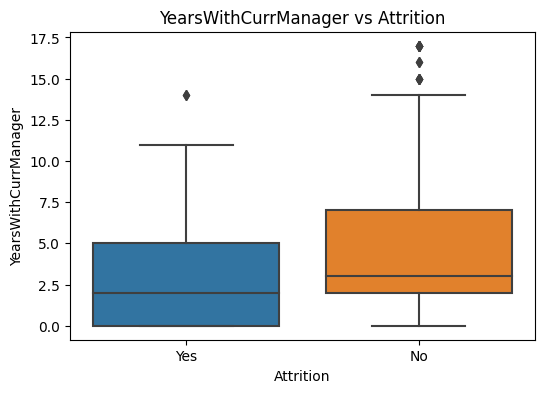

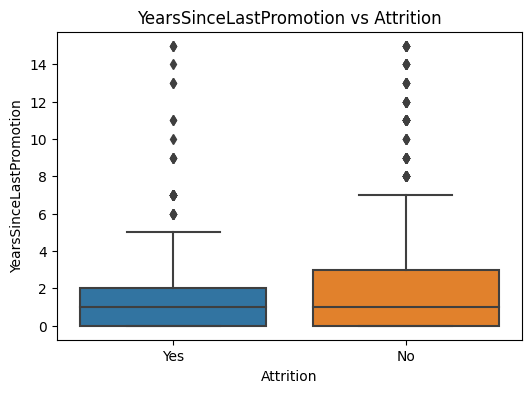

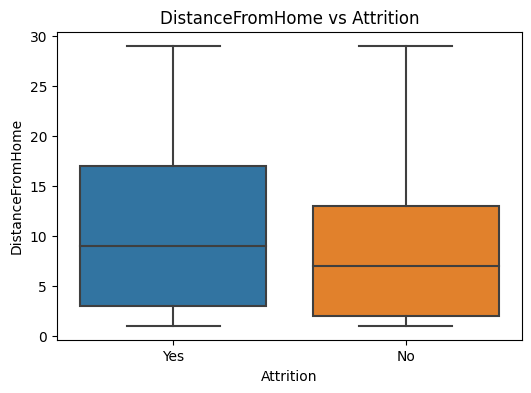

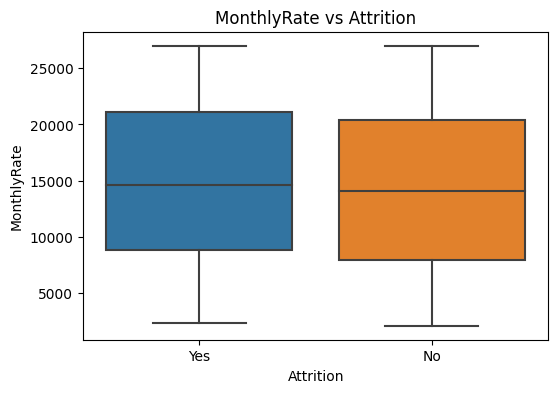

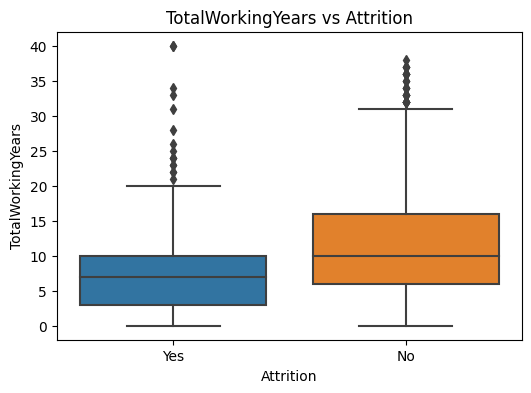

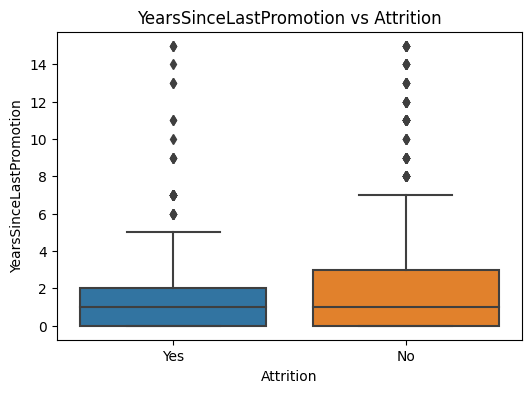

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns


num_cols = ['MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager','YearsSinceLastPromotion','DistanceFromHome', 'MonthlyRate', 'TotalWorkingYears', 'YearsSinceLastPromotion']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Attrition', y=col, data=df_pandas)
    plt.title(f'{col} vs Attrition')
    plt.show()





The Boxplot shows that median values for distance from Home and Monthly rate for the Attrition group is at higher end. While other variables showed some outliers. 

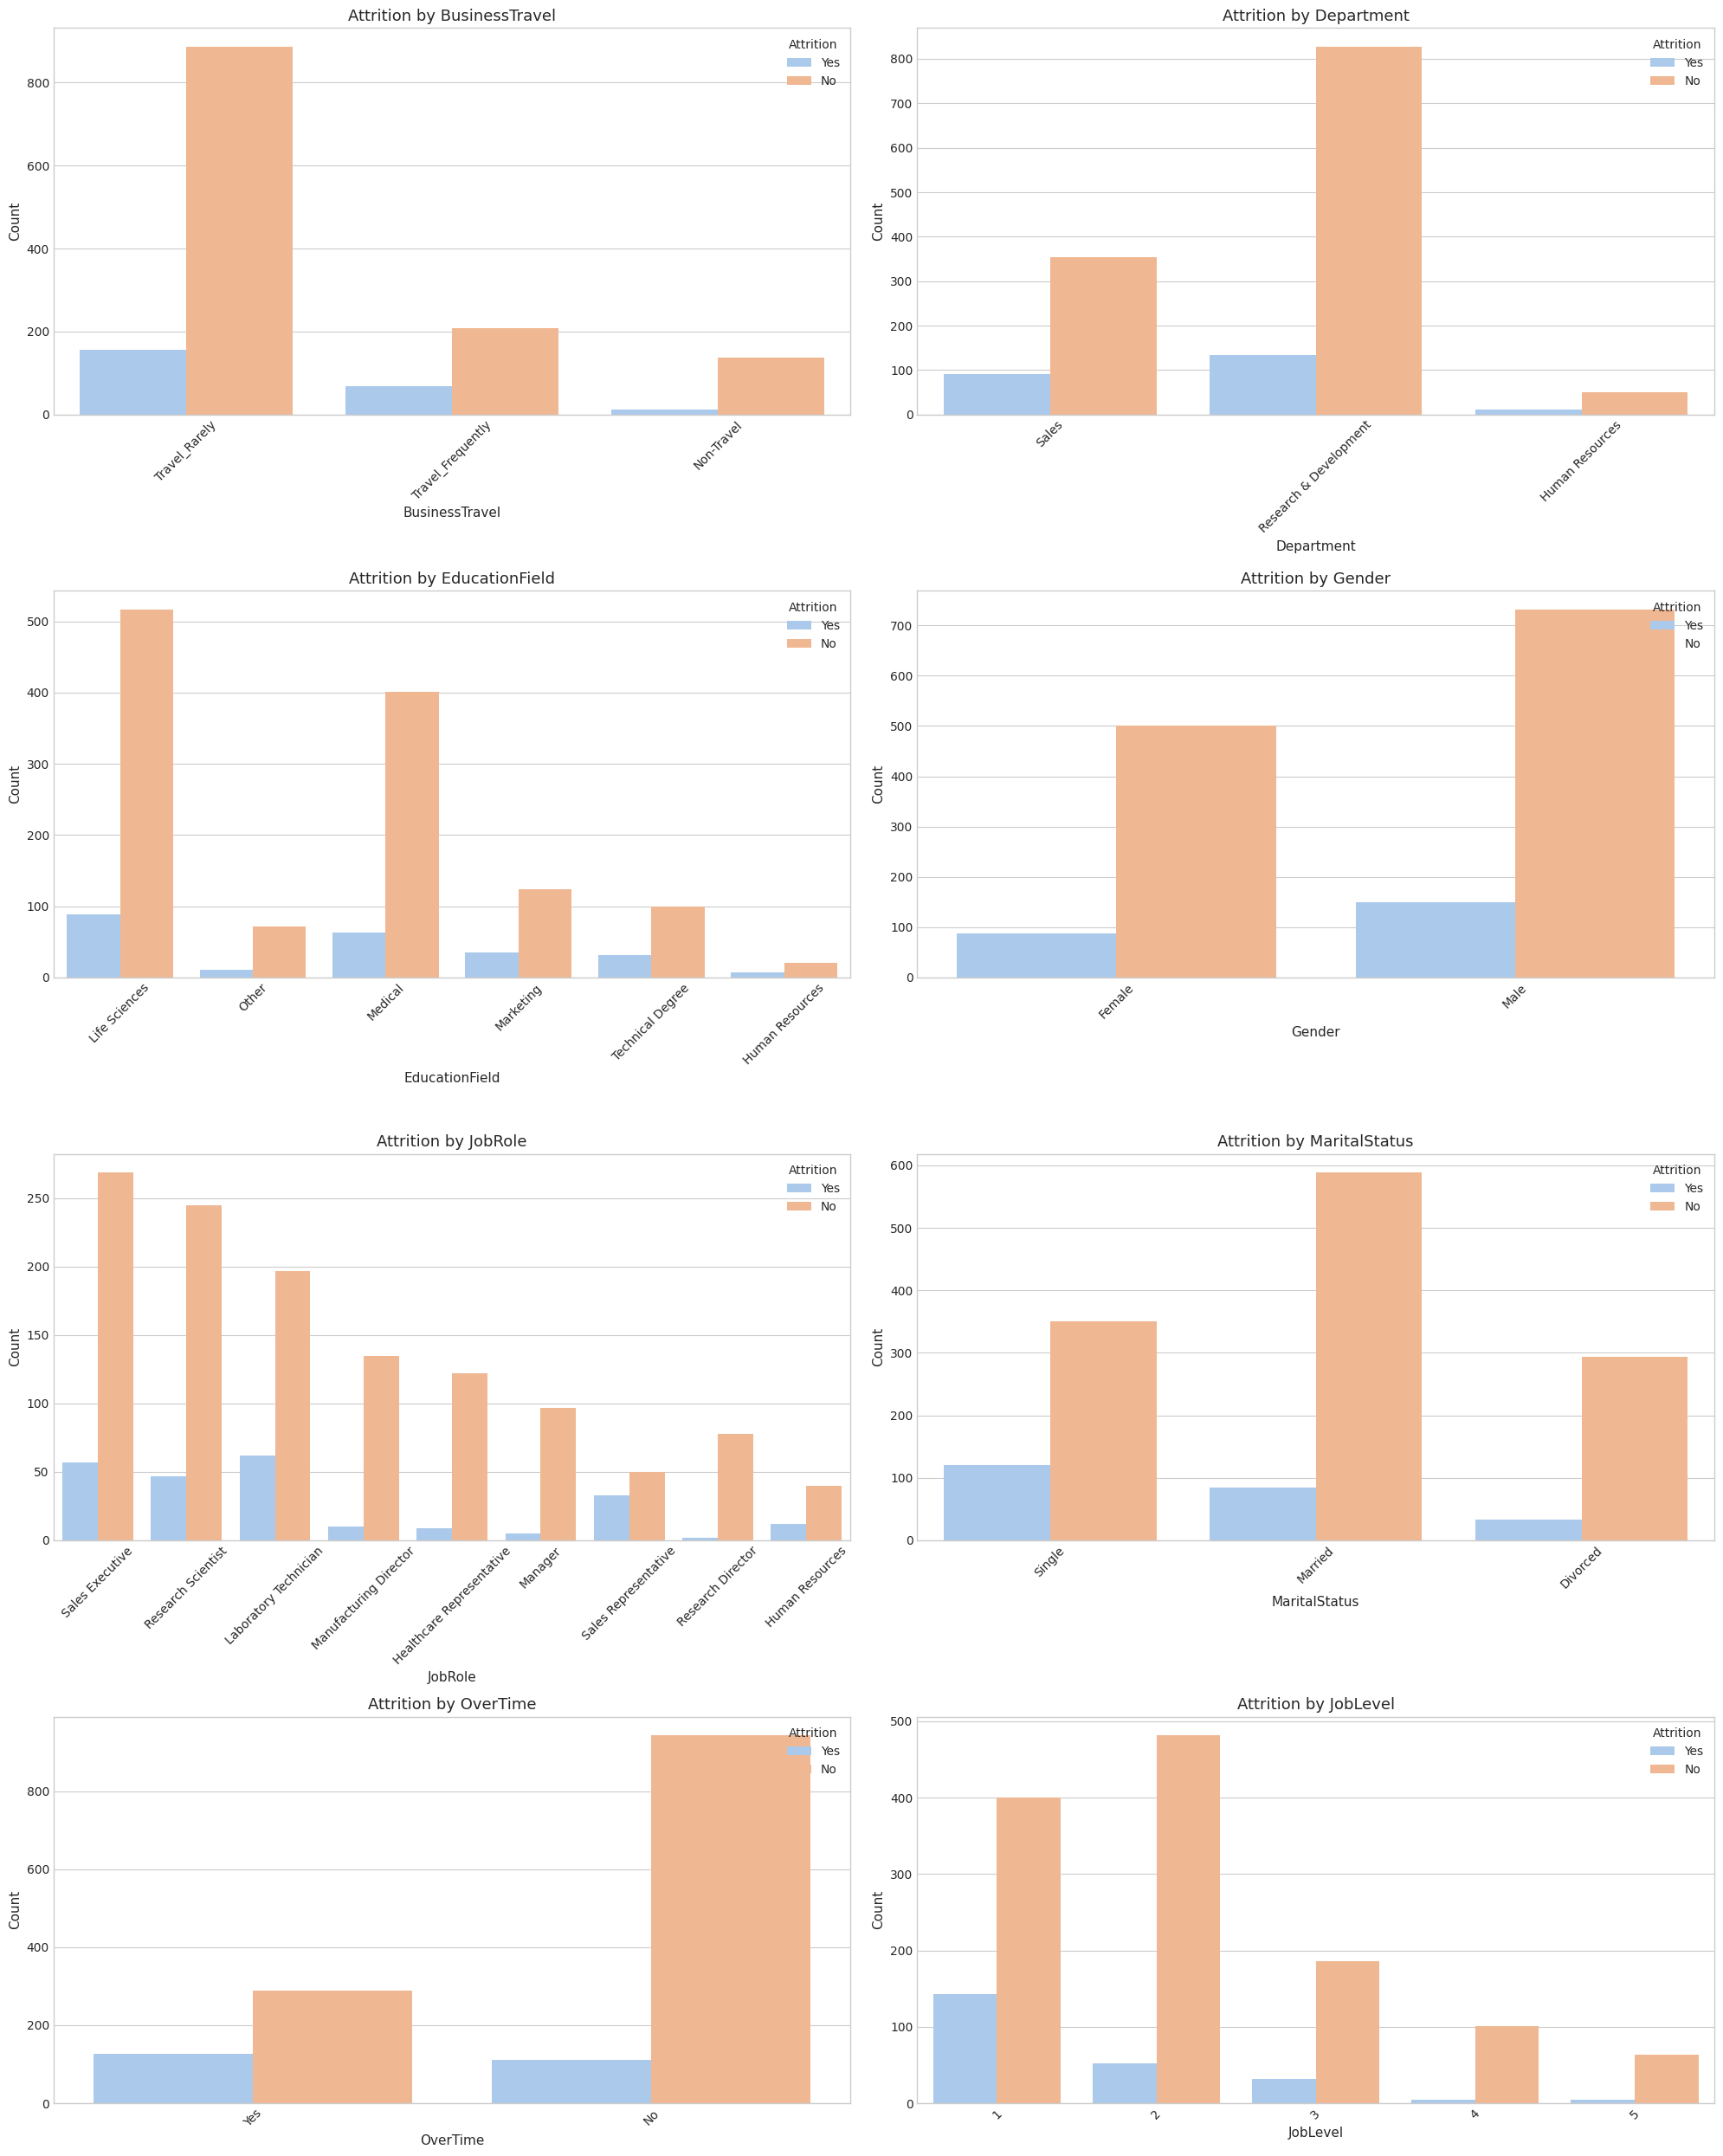

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender', 
    'JobRole', 'MaritalStatus', 'OverTime', 'JobLevel'
]

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Plot countplots for each categorical column vs Attrition
plt.figure(figsize=(20, 25))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, hue='Attrition', data=df_pandas, palette='pastel')
    plt.title(f'Attrition by {col}', fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Count', fontsize=11)
    plt.xticks(rotation=45)
    plt.legend(title='Attrition', loc='upper right')

plt.tight_layout()
plt.show()


In [0]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split

# Define target variable
target = 'Attrition'

# Split dataset into train and test
X = df_pandas.drop(columns=[target])
y = df_pandas[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Combine back for analysis on training data
train_df = X_train.copy()
train_df[target] = y_train

# Define categorical and numerical columns
categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender', 
    'JobRole', 'MaritalStatus', 'OverTime', 'JobLevel'
]

numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()

# --- CHI-SQUARE TEST ---
print("🔹 Chi-Square Test for Categorical Variables (Train Data):\n")
for col in categorical_cols:
    contingency_table = pd.crosstab(train_df[col], train_df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: p-value = {p:.4f}")
    if p < 0.05:
        print(f"   ➤ Significant relationship with Attrition\n")
    else:
        print(f"   ➤ No significant relationship\n")


🔹 Chi-Square Test for Categorical Variables (Train Data):

BusinessTravel: p-value = 0.0000
   ➤ Significant relationship with Attrition

Department: p-value = 0.0055
   ➤ Significant relationship with Attrition

EducationField: p-value = 0.0120
   ➤ Significant relationship with Attrition

Gender: p-value = 0.4418
   ➤ No significant relationship

JobRole: p-value = 0.0000
   ➤ Significant relationship with Attrition

MaritalStatus: p-value = 0.0000
   ➤ Significant relationship with Attrition

OverTime: p-value = 0.0000
   ➤ Significant relationship with Attrition

JobLevel: p-value = 0.0000
   ➤ Significant relationship with Attrition



In [0]:
# --- T-TEST ---
print("\n🔹 T-Test for Numerical Variables (Train Data):\n")
for col in numeric_cols:
    group_yes = train_df[train_df[target] == 'Yes'][col]
    group_no = train_df[train_df[target] == 'No'][col]
    t_stat, p = ttest_ind(group_yes, group_no, equal_var=False, nan_policy='omit')
    print(f"{col}: p-value = {p:.4f}")
    if p < 0.05:
        print(f"   ➤ Mean difference is statistically significant\n")
    else:
        print(f"   ➤ No significant difference\n")


🔹 T-Test for Numerical Variables (Train Data):

Age: p-value = 0.0000
   ➤ Mean difference is statistically significant

DailyRate: p-value = 0.0159
   ➤ Mean difference is statistically significant

DistanceFromHome: p-value = 0.0045
   ➤ Mean difference is statistically significant

Education: p-value = 0.2930
   ➤ No significant difference

EmployeeCount: p-value = nan
   ➤ No significant difference

EmployeeNumber: p-value = 0.4227
   ➤ No significant difference

EnvironmentSatisfaction: p-value = 0.0003
   ➤ Mean difference is statistically significant

HourlyRate: p-value = 0.5070
   ➤ No significant difference

JobInvolvement: p-value = 0.0001
   ➤ Mean difference is statistically significant

JobLevel: p-value = 0.0000
   ➤ Mean difference is statistically significant

JobSatisfaction: p-value = 0.0005
   ➤ Mean difference is statistically significant

MonthlyIncome: p-value = 0.0000
   ➤ Mean difference is statistically significant

MonthlyRate: p-value = 0.4562
   ➤ No signi

The t-test and chi-square analyses were conducted to examine relationships between various features and employee attrition.

Features such as Years Since Last Promotion, Gender, Monthly Rate, Number of Companies Worked, Percent Salary Hike, Performance Rating, Employee Number, Hourly Rate, Education, and Relationship Satisfaction showed no statistically significant relationship with attrition (all p-values > 0.05).

This indicates that these variables, when considered individually, do not have a strong influence on whether an employee leaves or stays. However, they may still contribute in combination with other factors when included in a predictive model.

In [0]:
print(df_pandas) 

      Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]


## Implementing Machine Learning Algorithms for Attrition Prediction

Lets see, how accurately can we we predict if an employee will stay or resign with these variables: 

In [0]:
%pip install imbalanced-learn mlflow xgboost scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 137.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 120.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 130.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 134.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.5/632.5 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 31.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found exist

In [0]:
%restart_python

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    precision_score, recall_score, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline as SkPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import mlflow
import mlflow.sklearn



As we see here the dataset is highly imbalanced with class O with 986 instances and class 1 with 190 instances only. I will apply SMOTE to balance the dataset. SMOTE will generate synthenic samples of minority class which is out target Attrition (1: Yes)

🔍 Class distribution before SMOTE:
No     986
Yes    190
Name: Attrition, dtype: int64


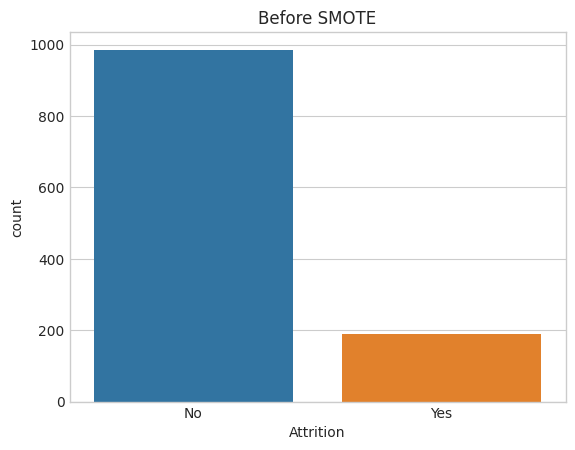

In [0]:
print("🔍 Class distribution before SMOTE:")
print(y_train.value_counts())
sns.countplot(x=y_train)
plt.title("Before SMOTE")
plt.show()



**""Running an MLflow experiment allows us to track and organize all aspects of our machine learning workflow in one place — including model versions, hyperparameters, metrics, artifacts (e.g., plots, data samples), and configurations. Each run within the experiment corresponds to the training and evaluation of a specific model with a defined set of parameters and preprocessing steps""** 


**Helps ensure reproducibility across different model versions.
Easy rollback or promotion of the best-performing model to production** 



In [0]:
# ✅ Start MLflow Experiment
mlflow.set_experiment("/Users/skanodia@horizon.csueastbay.edu/Attrition_Prediction_Version1")


<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/1693804713496695', creation_time=1759638168948, experiment_id='1693804713496695', last_update_time=1759642531927, lifecycle_stage='active', name='/Users/skanodia@horizon.csueastbay.edu/Attrition_Prediction_Version1', tags={'mlflow.experiment.sourceName': '/Users/skanodia@horizon.csueastbay.edu/Attrition_Prediction_Version1',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'skanodia@horizon.csueastbay.edu',
 'mlflow.ownerId': '5562211010027233'}>

In [0]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

# ====================
# 2. Define Feature Groups (only those needing work)
# ====================
ordinal_features = [
    "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction",
    "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"
]

categorical_features = [
    "BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"
]

log_numeric_features = [
    "DistanceFromHome", "MonthlyIncome", "YearsAtCompany",
    "YearsSinceLastPromotion", "TotalWorkingYears"
]

binary_features = ["Gender", "OverTime"]  # assumed already 0/1

# ====================
# 3. Transformers
# ====================
ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)))
])

log_numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(np.log1p, validate=False)),
    ("scaler", StandardScaler())
])

binary_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary"))
])


# ====================
# 4. ColumnTransformer
# ====================
preprocessor = ColumnTransformer(
    transformers=[
        ("ord", ordinal_transformer, ordinal_features),
        ("cat", categorical_transformer, categorical_features),
        ("log_num", log_numeric_transformer, log_numeric_features),
        ("bin", binary_transformer, binary_features),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)


In [0]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    precision_recall_curve, classification_report
)
import mlflow
from mlflow.models.signature import infer_signature
import pandas as pd
import numpy as np

# --- If you hit SMOTE+sparse issues, switch OneHotEncoders to dense: ---
# OneHotEncoder(handle_unknown="ignore", sparse_output=False)

def train_and_log(model, param_grid, model_name, preprocessor, X_train, y_train, X_test, y_test):

    # ---- Convert labels to numeric (0 = No, 1 = Yes) once ----
    y_train = pd.Series(y_train).astype(str).str.strip().str.lower().map({'no': 0, 'yes': 1}).astype(int)
    y_test  = pd.Series(y_test).astype(str).str.strip().str.lower().map({'no': 0, 'yes': 1}).astype(int)

    with mlflow.start_run(run_name=model_name):

        # 1) Train pipeline: preprocessor -> SMOTE -> clf
        pipe = ImbPipeline(steps=[
            ("preprocessor", preprocessor),
            ("smote", SMOTE(random_state=42)),
            ("clf", model)
        ])

        # 2) Grid search
        grid = GridSearchCV(pipe, param_grid, cv=5, scoring="f1", n_jobs=1)
        grid.fit(X_train, y_train)
        best_pipe = grid.best_estimator_

        # 3) Predict on test (numeric)
        y_pred  = best_pipe.predict(X_test)
        y_proba = best_pipe.predict_proba(X_test)[:, 1]

        # ✅ Use y_test directly (already numeric)
        y_test_num = y_test.to_numpy()

        # 4) Metrics @ 0.5
        metrics = {
            "accuracy":  accuracy_score(y_test_num, y_pred),
            "precision": precision_score(y_test_num, y_pred),
            "recall":    recall_score(y_test_num, y_pred),
            "f1":        f1_score(y_test_num, y_pred),
            "roc_auc":   roc_auc_score(y_test_num, y_proba),
        }
        mlflow.log_params(grid.best_params_)
        mlflow.log_metrics({k: float(v) for k, v in metrics.items()})

        # 5) F1-optimal threshold
        prec, rec, thr = precision_recall_curve(y_test_num, y_proba)
        f1_curve = 2 * (prec * rec) / (prec + rec + 1e-6)
        idx = int(np.argmax(f1_curve[:-1]))
        best_thr = float(thr[idx])
        y_pred_opt = (y_proba >= best_thr).astype(int)

        mlflow.log_param("optimal_threshold", best_thr)
        mlflow.log_metrics({
            "adjusted_precision": float(prec[idx]),
            "adjusted_recall":    float(rec[idx]),
            "adjusted_f1":        float(f1_curve[idx]),
        })

        # 6) Log SERVING pipeline (preprocessor + clf only; NO SMOTE)
        from sklearn.pipeline import Pipeline as SKPipeline
        serving_pipeline = SKPipeline(steps=[
            ("preprocessor", best_pipe.named_steps["preprocessor"]),
            ("clf",          best_pipe.named_steps["clf"]),
        ])
        input_example = X_test.iloc[[0]]
        signature = infer_signature(input_example, serving_pipeline.predict(input_example))
        mlflow.sklearn.log_model(
            sk_model=serving_pipeline,
            artifact_path=model_name,
            input_example=input_example,
            signature=signature
        )

        # 7) Console reports
        print(f"\n{model_name} @ 0.5\n", classification_report(y_test_num, y_pred))
        print(f"\n{model_name} @ tuned thr = {best_thr:.3f}\n", classification_report(y_test_num, y_pred_opt))


In [0]:
# -------------------------
# Example calls (your models)
# -------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

log_model = LogisticRegression(solver="liblinear", class_weight="balanced", max_iter=1000)
log_param_grid = {"clf__C": [0.1, 1, 10], "clf__penalty": ["l1", "l2"]}

rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {"clf__n_estimators": [100, 200], "clf__max_depth": [4, 6, 8], "clf__min_samples_split": [2, 5]}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_param_grid = {"clf__n_estimators": [100, 200], "clf__max_depth": [3, 5], "clf__learning_rate": [0.01, 0.1]}

# Train + log each (reuses your existing preprocessor and splits)
train_and_log(log_model, log_param_grid, "LogisticRegression", preprocessor, X_train, y_train, X_test, y_test)
train_and_log(rf_model,  rf_param_grid,  "RandomForest",       preprocessor, X_train, y_train, X_test, y_test)
train_and_log(xgb_model, xgb_param_grid, "XGBoost",            preprocessor, X_train, y_train, X_test, y_test)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xff92a57968e0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex


LogisticRegression @ 0.5
               precision    recall  f1-score   support

           0       0.93      0.81      0.87       247
           1       0.41      0.68      0.51        47

    accuracy                           0.79       294
   macro avg       0.67      0.75      0.69       294
weighted avg       0.85      0.79      0.81       294


LogisticRegression @ tuned thr = 0.776
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       247
           1       0.59      0.47      0.52        47

    accuracy                           0.86       294
   macro avg       0.75      0.70      0.72       294
weighted avg       0.85      0.86      0.86       294



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xff92ac764680>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex


RandomForest @ 0.5
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       247
           1       0.46      0.40      0.43        47

    accuracy                           0.83       294
   macro avg       0.68      0.66      0.67       294
weighted avg       0.82      0.83      0.83       294


RandomForest @ tuned thr = 0.330
               precision    recall  f1-score   support

           0       0.96      0.80      0.87       247
           1       0.44      0.83      0.58        47

    accuracy                           0.81       294
   macro avg       0.70      0.82      0.73       294
weighted avg       0.88      0.81      0.83       294



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xff92a3d5cea0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'
Ex


XGBoost @ 0.5
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.60      0.32      0.42        47

    accuracy                           0.86       294
   macro avg       0.74      0.64      0.67       294
weighted avg       0.84      0.86      0.84       294


XGBoost @ tuned thr = 0.215
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       247
           1       0.43      0.64      0.51        47

    accuracy                           0.81       294
   macro avg       0.68      0.74      0.70       294
weighted avg       0.84      0.81      0.82       294




#### Key Insight.

Our Random Forest model predicts employee attrition with 82% recall and 45% precision at a 0.35 threshold — meaning we correctly identify 82% of employees likely to leave while keeping false positives reasonably low.”

#### Threshold & Business Trade-off

How changing thresholds affects decisions:

Higher threshold → fewer false alarms (precision ↑)
Lower threshold → more leavers caught (recall ↑)


**High-Risk Factors:**

 Overtime, Low job satisfaction, Low income, Poor work-life balance

** Employee Segments Most Affected:**

- Junior-level employees (low JobLevel, less tenure)
- Employees with long commutes or frequent travel
- Those with limited growth or recognition.

**Recommendation:**

- Monitor satisfaction & workload regularly

- Design retention bonuses or stock options

- Improve manager engagement programs

- Enable flexible work or hybrid policies